# Sentiment Analysis and Prediction in Python## By: Hrishikesh Dipak Desai

In [1]:
%%capture
!pip install wordcloud

In [2]:
# Import libraries
import pandas as pd
import numptarget as np
import matplotlib.ptargetplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplatarget

# Load data as a DataFrame
df = pd.read_csv('movie_reviews.csv')

# Preview the data
df.sample(3)

,text,label
1640,"Blonde and Blonder was unfunny.Basically, it w...",0
2400,I just checked out Northanger Abbey from the l...,1
3257,This is an excellent film!Tom Hanks and Paul N...,1


## Inspect and explore our data
We can inspect the data types and the number of non-null rows per column using the [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) method.

In [3]:
# Inspect the data ttargetpes and non-null rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4000 non-null   object
 1   label   4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB


As this is a classification problem, we will want to inspect the balance of our target variable `label`. We can use [`.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) with `normalize` set to `True` to return the proportion of each class label.

In [4]:
# Check the value counts of the sentiment label
df["label"].value_counts(normalize=True)

0    0.5085
1    0.4915
Name: label, dtype: float64

One way to inspect our text data is to create a word cloud, which shows the most frequent words by size. To create one, we initialize a [`WordCloud()`](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud). Specifying the stopwords allows us to filter out generic words such as "the" and "and".

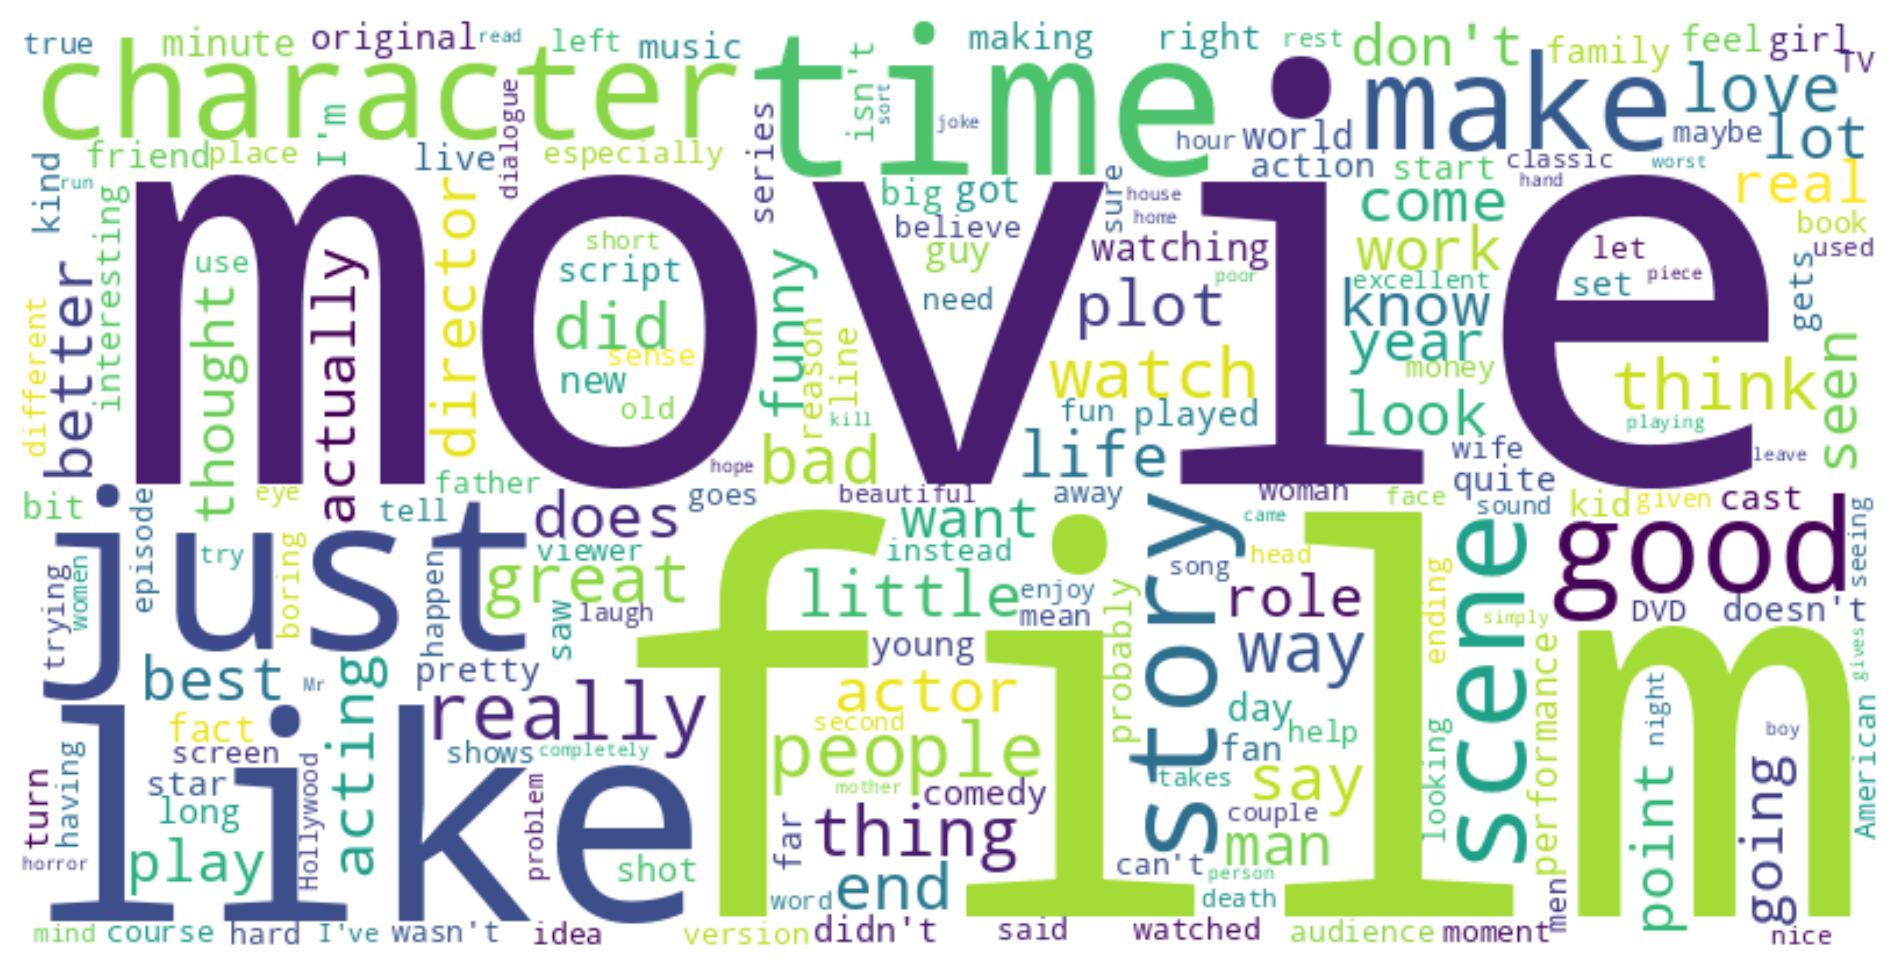

In [5]:
# Concatenate the text review data
reviews = " ".join(df["text"])

# Create the word cloud image
word_cloud = WordCloud(background_color = "white", 
                      stopwords = ENGLISH_STOP_WORDS,
                       width = 800,
                       height = 400
                      )

# Generate the word cloud using the review data
word_cloud.generate(reviews)

# Displatarget the word cloud
plt.rcParams["figure.figsize"] = (12,8)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Pre-processing the review text
To pre-process the text, we will use the term frequency-inverse document frequency, or TfIdf. TfIdf is a way of calculating the importance of words in a collection of different sets of text (or documents).
TfIdf has the advantages of:

- Highlighting words that are common within a document but not across documents.
- Returning low scores for words common across all reviews (e.g., movie in movie reviews).
- Penalizing frequent words so we don't need to worry about stop words as much.

Fortunately, Scikit-Learn has a [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) class that can convert text data into a set of TfIdf features.

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Speciftarget the word pattern
pattern = r"[a-zA-Z]+"

# Build the vectorizer and fit to the text data
vect = TfidfVectorizer(
    token_pattern=pattern,
    stop_words='english', 
    ngram_range=(1, 2),
    max_features=500
)

vect.fit(df["text"])

# Create sparse matrix from the vectorizer
tokenized_features = vect.transform(df["text"])

# Create a DataFrame of the new features
features = pd.DataFrame(data=tokenized_features.toarratarget(),
                        columns=vect.get_feature_names_out())

features

,able,absolutely,act,acting,action,actor,actors,actress,actually,add,age,ago,amazing,american,animation,annoying,apparently,aren,aren t,art,attempt,attention,audience,avoid,away,awful,b,bad,based,basically,beautiful,beginning,believe,best,better,big,bit,black,blood,book,...,voice,want,wanted,wants,war,wasn,wasn t,waste,watch,watched,watching,way,went,white,wife,wish,woman,women,won,won t,wonder,wonderful,words,work,works,world,worse,worst,worth,wouldn,wouldn t,writer,writing,written,wrong,year,year old,years,yes,young
0,0.000000,0.073909,0.077820,0.140430,0.062353,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.164405,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.162479,0.0,0.0,0.0,0.366580,0.0,0.000000,0.000000,0.000000,0.065129,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.073026,0.0,0.0,0.067665,0.067665,0.0,0.046747,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055849,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.086017,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.075404,0.000000,0.0,0.0,0.0,0.196591,0.0,0.086992,0.074315,0.000000,0.069855,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.078325,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.079176,0.000000,0.068909,0.000000,0.000000,0.0,0.0,0.158546,0.0,0.0,0.0,0.059755,0.080679,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.109195,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.121976,0.000000,0.000000,0.082918,0.000000,0.099768,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.151444,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.127944,0.0,0.000000,0.000000,0.000000,0.000000,0.139834,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.162247,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.149545,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.175617,0.000000,0.220499,0.220499,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.138907,0.000000,0.140286,0.000000,0.000000,0.000000,0.097776,0.0,0.201605,0.000000,0.0,0.0,0.139886,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.141724,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210204,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.168692,0.0,0.0,0.0,0.145733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110813,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.143631,0.000000,0.0,0.0,0.0,0.093618,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.138245,0.138245,0.0,0.095506,0.130605,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.

Let's add a few more features about the nature of the review, calculating different length metrics for the text (inspired by this [great article](https://towardsdatascience.com/text-analysis-feature-engineering-with-nlp-502d6ea9225d)).

In [10]:
# Generate a number of different length metrics based on the text
df["char_count"] = df["text"].str.count(r"\S")
df["word_count"] = df["text"].str.count(pattern)
df["avg_word_length"] = df["char_count"] / df["word_count"]

# Preview our new columns
df.sample(3)

,text,label,char_count,word_count,avg_word_length
2897,"Well, what can it be said about this disaster?...",0,558,123,4.536585
768,The ending made my heart jump up into my throa...,0,247,57,4.333333
2031,"The best thing about ""The Prey"" is the tag lin...",0,293,69,4.246377


## Fit a model and evaluate its performance
Finally, we assign our features and target to `X` and `y`, respectively, split our data into train and test subsets, and fit a classification model to the data.

In this case, we use a simple [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and calculate the classification metrics using the test set and our predicted values.

In [12]:
# Define features and target
features = pd.concat([features, df.loc[:, "char_count":]], axis=1)
target = df["label"]

# Train/test split
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size = 0.25,
    random_state=42
)

# Train a random forest classifier
rf = RandomForestClassifier(random_state=42).fit(features_train, target_train)

# Predict the labels
target_pred = rf.predict(features_test)

# Print classification metrics
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       523
           1       0.76      0.80      0.78       477

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.78      1000
weighted avg       0.79      0.79      0.79      1000



We can also generate a confusion matrix using [`ConfusionMatrixDisplay.from_estimator()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay#sklearn.metrics.ConfusionMatrixDisplay.from_estimator) to gain additional insights into the performance of our classification. This allows us to see what percentage of predictions were true positives, true negatives, false positives, and false negatives.

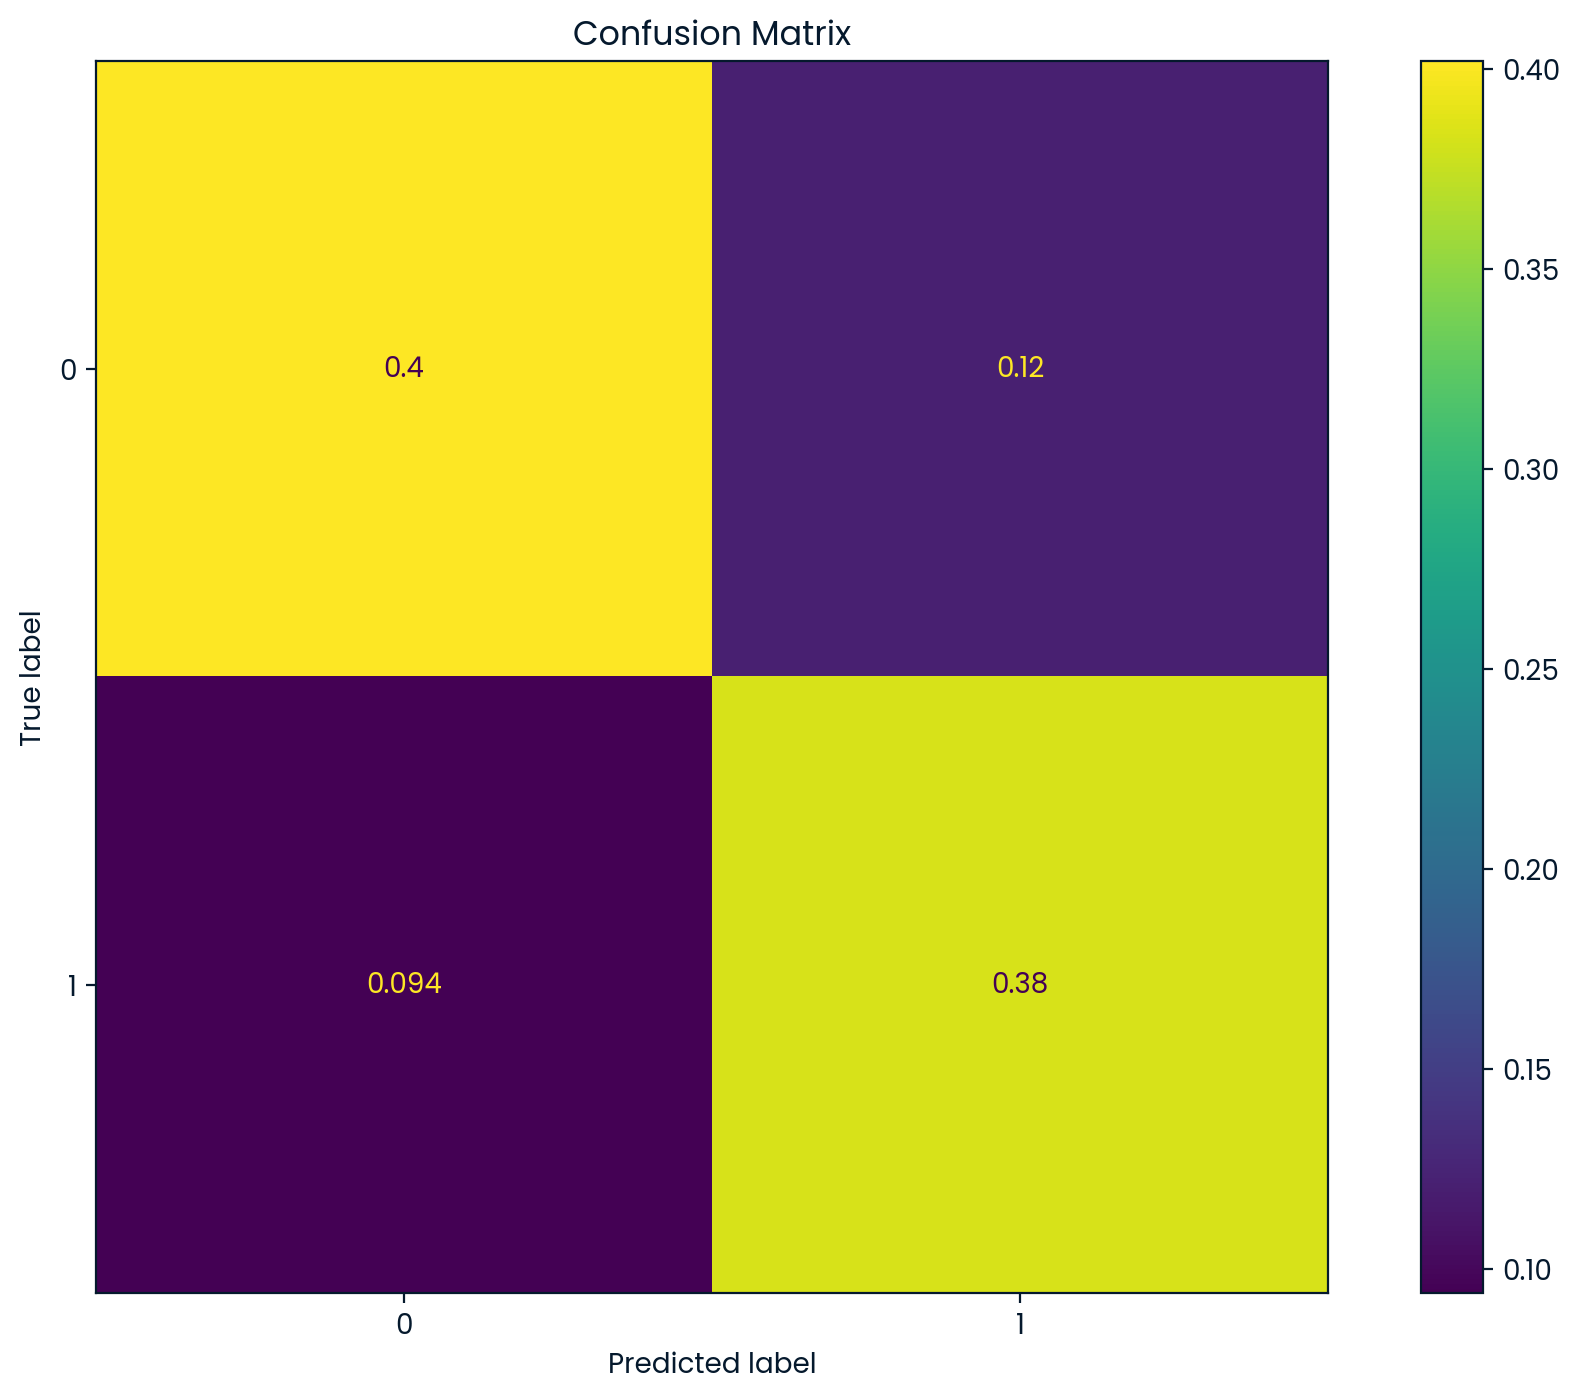

In [14]:
# Print a confusion matrix for the model
ConfusionMatrixDisplatarget.from_estimator(rf, features_test, target_test, normalize="all")
plt.title("Confusion Matrix")
plt.show()

For one final step, let's look at the feature importances to see which words (or features) were most relevant.

In [15]:
# Create a DataFrame of the features and their importances
pd.DataFrame(
    {"feature": features.columns, "importance": rf.feature_importances_}
).sort_values(btarget = "importance", ascending = False)

,feature,importance
27,bad,0.045045
487,worst,0.031163
174,great,0.021562
415,t,0.016111
25,awful,0.015166
...,...,...
420,talent,0.000416
482,words,0.000411
160,game,0.000385
17,aren,0.000374
